                                       Eli Shillman



## Table of Contents

#### 1. Introduction

* 1.1 Written Introduction

* 1.2 Imports

#### 2. Data Exploration

* 2.1 Numeric Data Exploration
    * 2.1.1 Max/Min Info for Numeric Variables
    * 2.1.2 Numeric Variable Histograms

* 2.2 Categorical Data Exploration
    * 2.2.1 Categorical Variable Histograms
* 2.3 Data Exploration Questions
    
#### 3. Data Cleaning

* 3.1 Check for Null Values
* 3.2 Handling Outliers
* 3.3 Handling Latitude and Longitude

#### 4. Evaluation

#### 5. Modeling
* 5.1 Preprocessing
* 5.2 Training
* 5.3 Testing My Own Information

#### 6. Conclusion
* 6.1 Process
* 6.2 Model Success
* 6.3 Moving Forward


# Introduction

## Written Introduction

The dataset contains information about students at a university from a given semester.

It contains information about the student's location, hours studied per week, parents' income, major, receiving tutoring, semester, credits taken, age, year of school, and the year it is.

The dataset contains both numeric and categorical data that will be used in order to attempt to predict student GPA.

Some challenges that might arise in attempting to predict GPA are:
* Missing information
* Non-holistic data (i.e. not accounting for all majors)
* Grade inflation
* Variables not included in the dataset that effect GPA

There are solutions to some of these problems that will be explored throughout the process of predicting, namely missing data and grade inflation.

Being able to predict student GPA is extremely useful for several reasons, such as: determining if a high school applicant should be admitted to the university, determining if a transfer applicant should be admitted to the university, predicting what a students final cumulative GPA will be, and determining what a student can do to help improve their GPA (if it is a controlable variable).

## Imports

* Pandas: Used to place data into dataframes
* Numpy: Used to perform mathematical functions
* Seaborn: Used to create plots
* Matplotlib: Used to create plots
* SKLearn (Imports in Modeling section): Used to train and test models and preprocess data
* Scipy (Import in Data Exploration section): Used for hypothesis testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)

In [145]:
all_data = pd.read_csv('my_data.csv')
del all_data[all_data.columns[0]]
all_data.head()

,id,lat,lon,gpa,avg_hours_studied,parents_income,major,tutoring,semester,year,credits,student_age,student_year
0,13251,38.878529,-76.776049,3.64,5,68628.72693,Math,No,Fall,2007,15,26,Freshman
1,13251,38.878529,-76.776049,3.65,5,68628.72693,Math,No,Spring,2008,15,27,Freshman
2,13251,38.878529,-76.776049,4.00,5,68628.72693,Math,No,Fall,2008,9,27,Sophmore
3,13251,38.878529,-76.776049,4.00,4,68628.72693,Math,No,Spring,2009,9,28,Sophmore
4,13251,38.878529,-76.776049,3.30,4,68628.72693,Math,No,Fall,2009,18,28,Junior


# Data Exploration

## Numeric Data Exploration

In [4]:
numeric = all_data.select_dtypes(include=[np.number])
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000000.0,63250.500000,28867.527892,13251.000000,38250.750000,63250.500000,88250.250000,113250.000000
lat,1000000.0,37.572477,2.772581,31.899546,38.399398,39.050620,39.296096,40.196585
lon,1000000.0,-84.171482,7.572241,-94.754033,-93.387511,-77.548696,-76.812233,-75.790679
gpa,1000000.0,3.557863,0.607225,0.000000,3.210000,3.870000,4.000000,4.100000
avg_hours_studied,1000000.0,5.437559,100.959857,0.000000,3.000000,4.000000,5.000000,10000.000000
parents_income,1000000.0,88670.500485,30835.445794,18229.301767,64680.880300,79932.013390,109623.813422,196273.337246
year,1000000.0,2014.978660,4.857990,2005.000000,2011.000000,2015.000000,2019.000000,2025.000000
credits,1000000.0,13.496022,3.353377,9.000000,9.000000,12.000000,15.000000,18.000000
student_age,1000000.0,21.234460,2.506658,17.000000,20.000000,21.000000,22.000000,33.000000


* Average location is in central Kentucky

* Income has high standard deviation

* Data spans from 2005 to 2025. Assume this data takes place in 2025 moving forwards

* Bad data in hours studied (10,000 max). These students will be entirely removed from the data. 

In [5]:
numeric = numeric[numeric['avg_hours_studied'] < 9999]

### Min/Max Info for Numeric Variables

In [6]:
numeric.describe().T[['min','max']]

,min,max
id,13251.000000,113250.000000
lat,31.899546,40.196585
lon,-94.754033,-75.790679
gpa,0.000000,4.100000
avg_hours_studied,0.000000,11.000000
parents_income,18229.301767,196273.337246
year,2005.000000,2025.000000
credits,9.000000,18.000000
student_age,17.000000,33.000000


### Numeric Variable Histograms

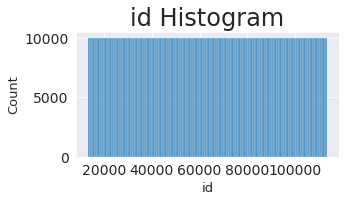

In [156]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'id')
ax.set(title='id Histogram')
plt.show()

id is not a variable represented well by a histogram

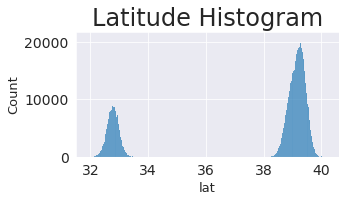

In [155]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'lat')
ax.set(title='Latitude Histogram')
plt.show()

Two clusters of locations around ~33 latitude and ~39 longitude

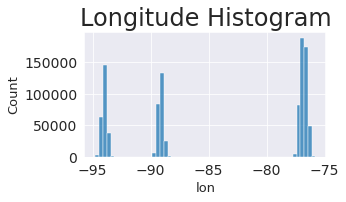

In [154]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'lon')
ax.set(title='Longitude Histogram')
plt.show()

Three clusters around -94 longitude, -89 longitude, and -77 longitude.

Latitude and Longitude will be useful to use in conjunction. Will seperate the students into clusters of where they live, as there are clearly a few locations where most students live. Can also be used to track students across semesters.

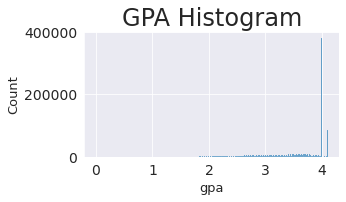

In [153]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'gpa')
ax.set(title='GPA Histogram')
plt.show()

In [11]:
numeric['gpa'].value_counts().head()

4.00    378377
4.10     83952
3.63      4752
3.66      4658
3.65      4624
Name: gpa, dtype: int64

A disproportionately high amount of students got a 4.0 GPA, over a third of data points. Grade inflation is an issue at this university.

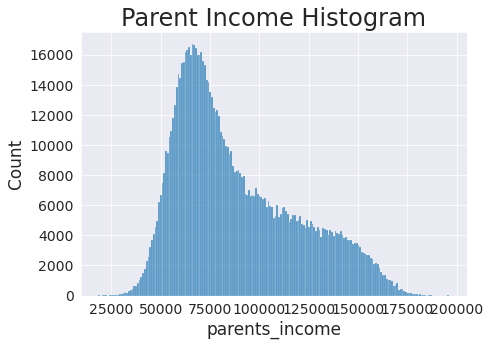

In [12]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'parents_income')
ax.set(title='Parent Income Histogram')
plt.show()

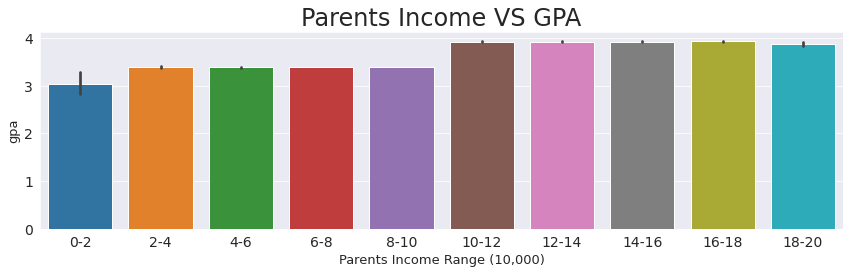

In [166]:
numeric['income_bin'] = pd.cut(numeric['parents_income']/10000, bins=range(0,21,2), labels=[f'{l}-{l+2}' for l in range(0,19,2)])
plt.figure(figsize=(12,4), tight_layout=True)
ax = sns.barplot(x='income_bin', y='gpa', data=numeric)
ax.set(title='Parents Income VS GPA', xlabel='Parents Income Range (10,000)')
plt.show()

Fairly well distributed. Slightly skewed left. Looks like higher income parents lead to significantly higher GPA. Will likely be useful in predicting GPA.

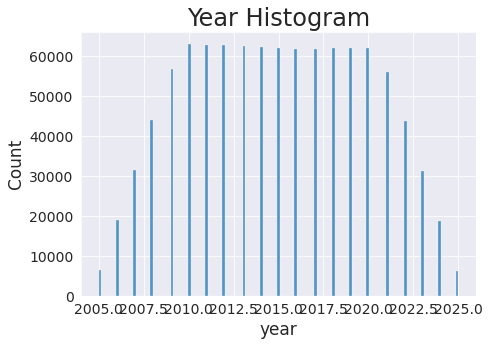

In [14]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'year')
ax.set(title='Year Histogram')
plt.show()

Well distributed

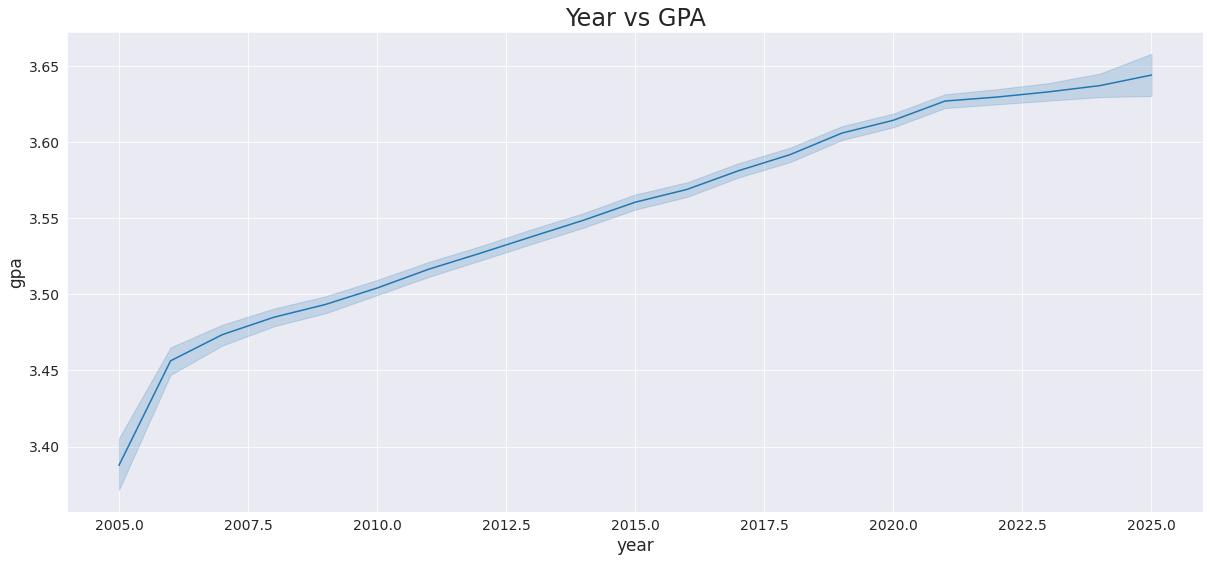

In [129]:
plt.figure(figsize=(17,8), tight_layout=True)
ax = sns.lineplot(x='year', y='gpa', data=numeric)
ax.set(title='Year vs GPA')
plt.show()

In [16]:
numeric.groupby(['year'])['gpa'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2005,6391.0,3.387655,0.660821,0.56,2.8600,3.59,4.0,4.0
2006,19018.0,3.456335,0.652258,0.00,2.9400,3.64,4.0,4.1
2007,31503.0,3.473509,0.648622,0.10,3.0200,3.67,4.0,4.1
2008,44104.0,3.484955,0.648002,0.10,3.0800,3.70,4.0,4.1
2009,56828.0,3.493360,0.645664,0.20,3.1000,3.73,4.0,4.1
2010,63006.0,3.504140,0.642288,0.00,3.1300,3.76,4.0,4.1
2011,62813.0,3.516511,0.634129,0.23,3.1500,3.77,4.0,4.1
2012,62756.0,3.527025,0.628130,0.00,3.1700,3.79,4.0,4.1
2013,62497.0,3.537920,0.621052,0.00,3.1900,3.82,4.0,4.1


Average GPA has increased over time. This is further evidence of grade inflation over the years. The median GPA has been 4.0 since 2021.

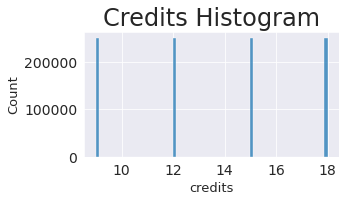

In [165]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'credits')
ax.set(title='Credits Histogram')
plt.show()

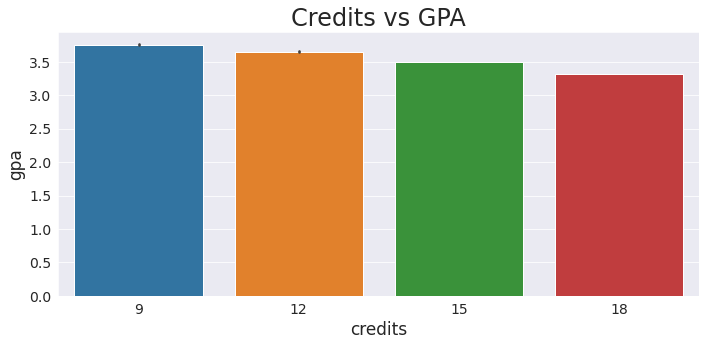

In [18]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='credits', y='gpa', data=numeric)
ax.set(title='Credits vs GPA')
plt.show()

In [19]:
numeric.groupby(['credits'])['gpa'].describe()

,count,mean,std,min,25%,50%,75%,max
credits,,,,,,,,
9,250238.0,3.757831,0.443252,0.48,3.62,4.00,4.0,4.1
12,250229.0,3.652293,0.537938,0.00,3.33,4.00,4.0,4.1
15,249986.0,3.499521,0.614747,0.00,3.04,3.76,4.0,4.1
18,249445.0,3.321023,0.709446,0.00,2.76,3.48,4.0,4.1


Students take 9, 12, 15, or 18 credits. Well distibuted between the 4 possibilities. Looks as if as students take more credits, their GPA suffers. Will be useful in predicting GPA.

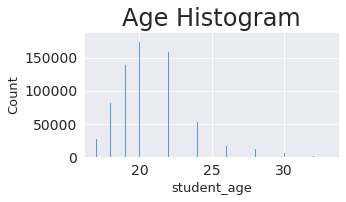

In [164]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'student_age')
ax.set(title='Age Histogram')
plt.show()

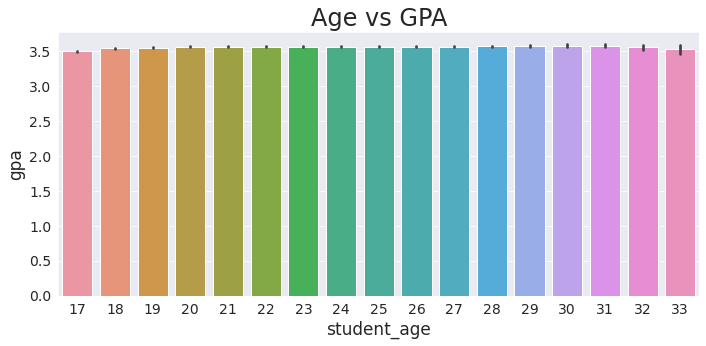

In [128]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='student_age', y='gpa', data=numeric)
ax.set(title='Age vs GPA')
plt.show()

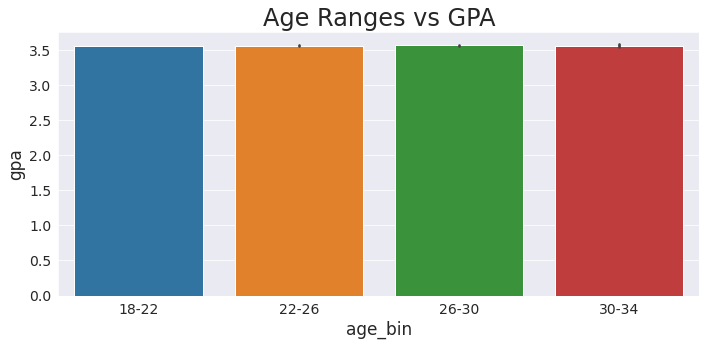

In [22]:
numeric['age_bin'] = pd.cut(numeric['student_age'], bins=range(18,35,4), labels=[f'{l}-{l+4}' for l in range(18,31,4)])
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='age_bin', y='gpa', data=numeric)
ax.set(title='Age Ranges vs GPA')
plt.show()

In [23]:
numeric['student_age'].value_counts()

21    179734
20    173005
22    158157
19    139325
23    107055
18     81230
24     52080
17     26388
25     21187
26     16896
27     13986
28     11346
29      8567
30      5791
31      3355
32      1446
33       350
Name: student_age, dtype: int64

In [24]:
numeric.groupby(['age_bin'])['gpa'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin,,,,,,,,
18-22,650221.0,3.560096,0.607082,0.00,3.22,3.88,4.0,4.1
22-26,197218.0,3.564230,0.605044,0.00,3.24,3.90,4.0,4.1
26-30,39690.0,3.569290,0.604823,0.25,3.25,3.93,4.0,4.1
30-34,5151.0,3.565989,0.600862,0.58,3.25,3.92,4.0,4.1


Ages consist of mostly students within the standard ages of college students (18-23) with some students younger at 17 and others older up to 32. Age does not appear to impact GPA. Graph 'Age VS GPA' shows little change due to age of average GPA. Graph 'Age Ranges VS GPA' visualizes standard college ages against other 5 year ranges, still little impact. Age is unlikely to be a good predictor of GPA.

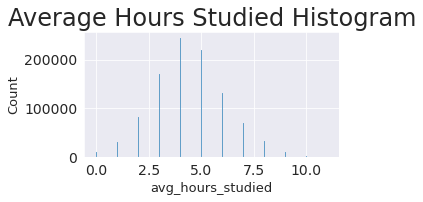

In [163]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=numeric, x = 'avg_hours_studied')
ax.set(title='Average Hours Studied Histogram')
plt.show()

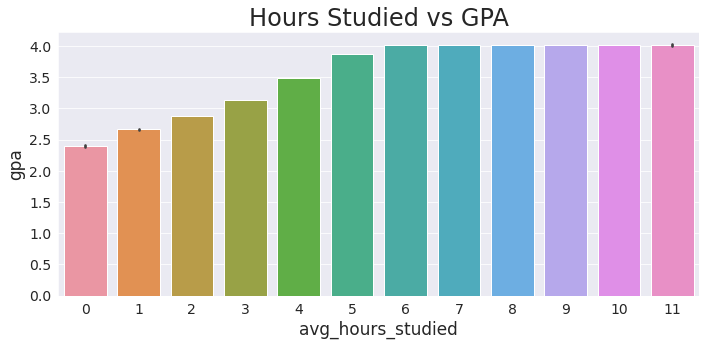

In [26]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='avg_hours_studied', y='gpa', data=numeric)
ax.set(title='Hours Studied vs GPA')
plt.show()

Average Hours Studied is well distributed with most students studying four hours a week. There is an obvious correlation between average hours studied per week and a student's GPA. This will be the most useful data for predicting GPA.

## Categorical Data Exploration

In [27]:
categorical = all_data.select_dtypes(include=[object])
categorical.head()

,major,tutoring,semester,student_year
0,Math,No,Fall,Freshman
1,Math,No,Spring,Freshman
2,Math,No,Fall,Sophmore
3,Math,No,Spring,Sophmore
4,Math,No,Fall,Junior


In [28]:
categorical.describe().T

,count,unique,top,freq
major,1000000,5,Physics,200833
tutoring,950502,2,No,923106
semester,1000000,2,Fall,500000
student_year,1000000,4,Senior,400000


* Five majors are represented by data, with the most popular being physics

* Very few students recieved tutoring

* There are exactly the same number of Fall and Spring semesters in the data

In [29]:
categorical['gpa'] = all_data.gpa

### Categorical Variable Histograms

In [30]:
categorical['major'].value_counts()

Physics        200833
Engineering    200787
CS             200505
Math           199750
English        198125
Name: major, dtype: int64

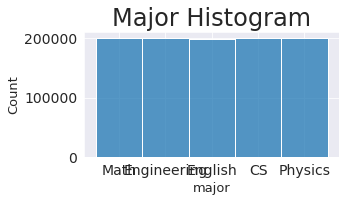

In [162]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'major')
ax.set(title='Major Histogram')
plt.show()

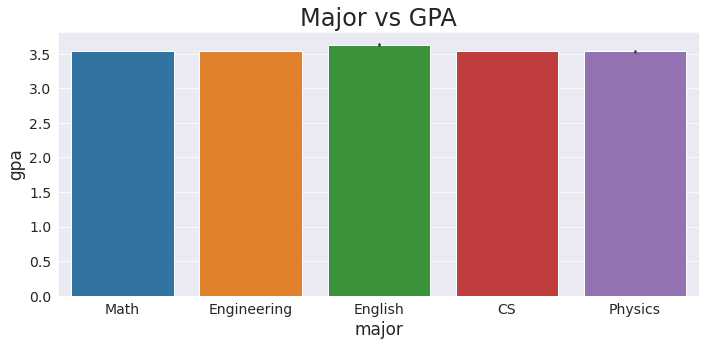

In [32]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='major', y='gpa', data=categorical)
ax.set(title='Major vs GPA')
plt.show()

In [33]:
categorical.groupby(['major']).describe()

gpa                                                
                count      mean       std   min   25%   50%  75%  max
major                                                                
CS           200505.0  3.535839  0.607557  0.00  3.18  3.84  4.0  4.0
Engineering  200787.0  3.544374  0.604892  0.26  3.21  3.87  4.0  4.0
English      198125.0  3.632158  0.604164  0.00  3.29  3.94  4.1  4.1
Math         199750.0  3.543705  0.605236  0.00  3.20  3.87  4.0  4.0
Physics      200833.0  3.534123  0.608551  0.00  3.17  3.84  4.0  4.0

In [34]:
categorical[categorical['major'] == 'English']['gpa'].value_counts()

4.10    83957
4.00     7974
3.63     1003
3.69      993
3.75      992
        ...  
1.70        1
1.04        1
0.56        1
0.58        1
0.98        1
Name: gpa, Length: 384, dtype: int64

English has a slightly higher average GPA than the other majors, which are all similar in average GPA. Only English Mmajors recieved over a 4.0 GPA, will handle this by setting any GPAs > 4.0 to 4.0. This will also likely make the English majors' average GPA in line with the others.

In [35]:
categorical.loc[categorical['gpa'] > 4.0, 'gpa'] = 4.00

In [36]:
categorical.groupby(['major']).describe()

gpa                                                
                count      mean       std   min   25%   50%  75%  max
major                                                                
CS           200505.0  3.535839  0.607557  0.00  3.18  3.84  4.0  4.0
Engineering  200787.0  3.544374  0.604892  0.26  3.21  3.87  4.0  4.0
English      198125.0  3.588636  0.571656  0.00  3.29  3.94  4.0  4.0
Math         199750.0  3.543705  0.605236  0.00  3.20  3.87  4.0  4.0
Physics      200833.0  3.534123  0.608551  0.00  3.17  3.84  4.0  4.0

English still has a higher GPA than other majors, may indicate slightly grade inflation in the English major.

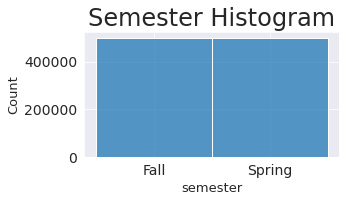

In [161]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'semester')
ax.set(title='Semester Histogram')
plt.show()

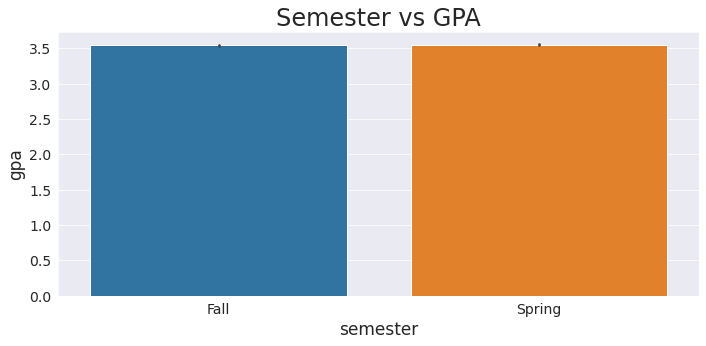

In [38]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='semester', y='gpa', data=categorical)
ax.set(title='Semester vs GPA')
plt.show()

In [39]:
categorical.groupby(['semester']).describe()

gpa                                               
             count      mean       std  min   25%   50%  75%  max
semester                                                         
Fall      500000.0  3.542868  0.602508  0.0  3.17  3.84  4.0  4.0
Spring    500000.0  3.555612  0.597696  0.0  3.25  3.91  4.0  4.0

What semester it is has little impact on GPA. This variable will not be used to predict GPA.

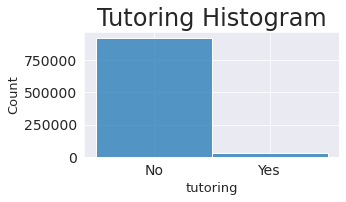

In [160]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'tutoring')
ax.set(title='Tutoring Histogram')
plt.show()

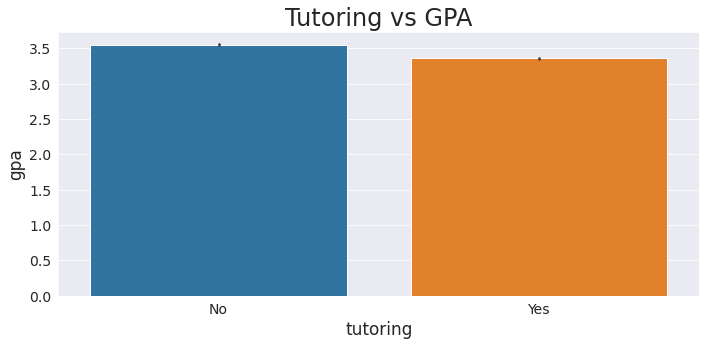

In [41]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.barplot(x='tutoring', y='gpa', data=categorical)
ax.set(title='Tutoring vs GPA')
plt.show()

In [42]:
categorical.groupby(['tutoring']).describe()

gpa                                               
             count      mean      std   min   25%   50%  75%  max
tutoring                                                         
No        923106.0  3.555414  0.59868  0.00  3.23  3.89  4.0  4.0
Yes        27396.0  3.359500  0.60056  0.19  2.97  3.43  4.0  4.0

Students that did not recieve tutoring had significantly higher average GPAs than those who did. This is counter to what would be expected. However, so few students recieved tutoring that it may be unwise to use this variable as a predictor for GPA.

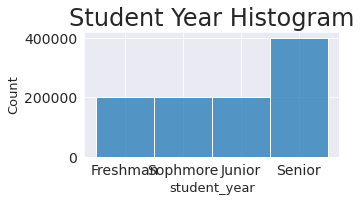

In [159]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'student_year')
ax.set(title='Student Year Histogram')
plt.show()

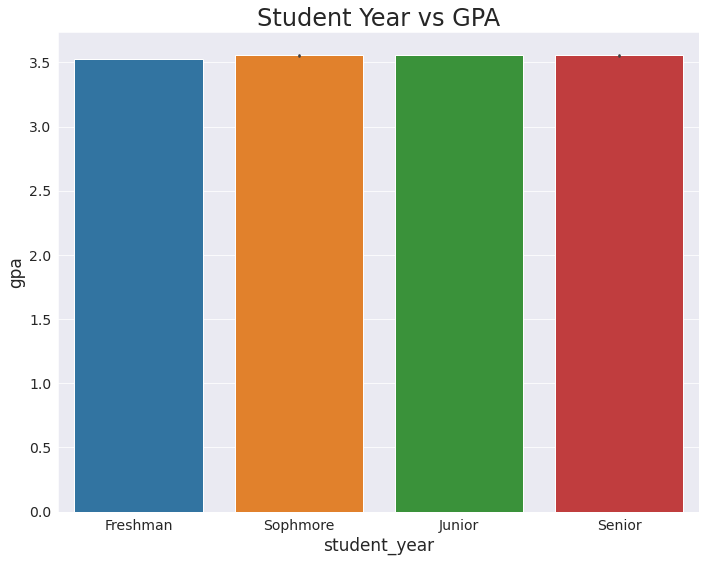

In [44]:
plt.figure(figsize=(10,8), tight_layout=True)
ax = sns.barplot(x='student_year', y='gpa', data=categorical)
ax.set(title='Student Year vs GPA')
plt.show()

In [45]:
categorical.groupby(['student_year']).describe()

gpa                                               
                 count      mean       std  min   25%   50%  75%  max
student_year                                                         
Freshman      200000.0  3.525209  0.607896  0.0  3.09  3.80  4.0  4.0
Junior        200000.0  3.556788  0.597027  0.0  3.25  3.91  4.0  4.0
Senior        400000.0  3.554948  0.598560  0.0  3.25  3.91  4.0  4.0
Sophmore      200000.0  3.554307  0.597992  0.0  3.24  3.91  4.0  4.0

Freshmen have a slightly lower average GPA than older students. However, there is not a significant correlation to GPA. Unlikely to be used as a predictor.

## Data Exploration Questions

#### Does this school have transfer students?

In [46]:
year_df = all_data.groupby(['id'])['student_year'].apply(', '.join).reset_index()
year_df.head()

,id,student_year
0,13251,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
1,13252,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
2,13253,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
3,13254,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
4,13255,"Freshman, Freshman, Sophmore, Sophmore, Junior..."


In [47]:
year_df.shape

(100000, 2)

The year_df dataframe contains all student years that each student has listed.

In [48]:
freshmen = year_df[year_df['student_year'].str.contains('Freshman, Freshman')]
freshmen.head()

,id,student_year
0,13251,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
1,13252,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
2,13253,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
3,13254,"Freshman, Freshman, Sophmore, Sophmore, Junior..."
4,13255,"Freshman, Freshman, Sophmore, Sophmore, Junior..."


In [49]:
freshmen.shape

(100000, 2)

In [50]:
seniors = year_df[year_df['student_year'].str.contains('Senior, Senior, Senior, Senior')]
seniors.shape


(100000, 2)

The freshmen dataframe contains all students that spent two semester at this university as a Freshman, hence making it impossible for them to have transferred to the University. There are the same number of students in this dataframe when compared to total students, thus there are no students that transferred into this University. In regards to students transferring out of the University, the seniors dataframe contains all students that spend four semesters at this university as senior, hence making it impossible that they transferred out of the university. There are the same number of students in this dataframe when compared to total students, thus there are no students that transferred out of this university.

#### What is the median length of attendence at this university?

Using the previous year dataframe, count the number of semesters each student spent at the university. This is done by counting the number of commas in the string created and adding one.

In [51]:
year_df['total_semesters'] = year_df['student_year'].str.count(',') + 1
year_df.head()

,id,student_year,total_semesters
0,13251,"Freshman, Freshman, Sophmore, Sophmore, Junior...",10
1,13252,"Freshman, Freshman, Sophmore, Sophmore, Junior...",10
2,13253,"Freshman, Freshman, Sophmore, Sophmore, Junior...",10
3,13254,"Freshman, Freshman, Sophmore, Sophmore, Junior...",10
4,13255,"Freshman, Freshman, Sophmore, Sophmore, Junior...",10


In [52]:
year_df['total_semesters'].median()

10.0

The median length of attendence at this university is 10 semesters.

#### Do you think this university has any one credit classes?

In [53]:
all_data['credits'].value_counts()

9     250264
12    250264
15    250006
18    249466
Name: credits, dtype: int64

The only amounts of credits taken by students at this university are 9, 12, 15, or 18. Due to these values being in intervals of 3 and divisible by 3, it is unlikely that there are any 1 credit classes. It is likely that this university only has 3 credit classes.

#### Is grade inflation a problem at this university?

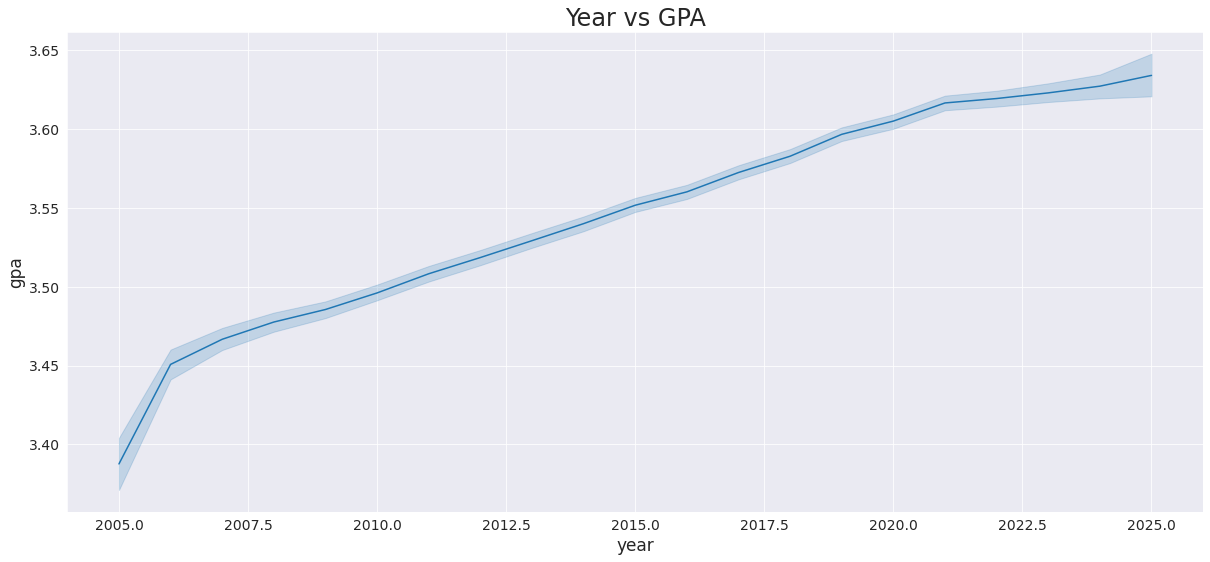

In [126]:
plt.figure(figsize=(17,8), tight_layout=True)
ax = sns.lineplot(x='year', y='gpa', data=all_data)
ax.set(title='Year vs GPA')
plt.show()

In [55]:
all_data.groupby('year')['gpa'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2005,6392.0,3.387455,0.660963,0.56,2.8600,3.59,4.0,4.0
2006,19019.0,3.456292,0.652268,0.00,2.9400,3.64,4.0,4.1
2007,31512.0,3.473510,0.648595,0.10,3.0200,3.67,4.0,4.1
2008,44111.0,3.484964,0.647977,0.10,3.0800,3.70,4.0,4.1
2009,56834.0,3.493322,0.645714,0.20,3.1000,3.73,4.0,4.1
2010,63014.0,3.504142,0.642260,0.00,3.1300,3.76,4.0,4.1
2011,62820.0,3.516568,0.634117,0.23,3.1500,3.77,4.0,4.1
2012,62763.0,3.526970,0.628149,0.00,3.1700,3.79,4.0,4.1
2013,62505.0,3.537912,0.621059,0.00,3.1900,3.82,4.0,4.1


In [56]:
100*all_data[all_data['gpa'] >= 4.00].shape[0]/all_data.shape[0]

46.6779

The above table shows how students' GPA has changed over time. There is an evident increase in GPA over time, with the median GPA in 2005 being 3.59 gradually increasing until 2021 where the median GPA became 4.0 and remained there to the present. This indicates that grade inflation is a problem at this university.

#### How often do students switch majors?

Create a dataframe that contains a list of all majors each semester for each student.

In [57]:
majors_df = all_data.groupby(['id'])['major'].apply(', '.join).reset_index()
majors_df.head()

,id,major
0,13251,"Math, Math, Math, Math, Math, Math, Math, Math..."
1,13252,"Engineering, Engineering, Engineering, Enginee..."
2,13253,"Math, Math, Math, Math, Math, Math, Math, Math..."
3,13254,"English, English, English, English, English, E..."
4,13255,"Math, Math, Math, Math, Math, Math, Math, Math..."


In [58]:
major_changes = 0
for idx, student in majors_df.iterrows():
    all_majors = student['major'].split(', ')
    if all(major == all_majors[0] for major in all_majors) == False:
        major_changes += 1
print(f'Number of students who switched majors: {major_changes}\nPercentage of students who switched majors: {100*major_changes/majors_df.shape[0]}')


Number of students who switched majors: 6785
Percentage of students who switched majors: 6.785


The above code checks that all majors listed for each student are the same throughout their time at the university. If any are different, this indicates that they switched majors. 6785 students switched majors which is 6.785% of students.

#### In what area do you think the University might be located?

In [59]:
avg_lat = all_data['lat'].mean()
avg_lon = all_data['lon'].mean()
print(f'Average latitude: {avg_lat}\nAverage longitude: {avg_lon}')

Average latitude: 37.572477039173805
Average longitude: -84.17148162333395


The average latitude of students that attend this university is 37.57, the average longitude is -84.17.

This latitude and longitude is located in central Kentucky. Thus, it is likely that this university is located somewhere in Kentucky. There are three clusters of students spread somewhat throughout Kentucky so the true location of the university might not be exactly at this average location.

#### Do different majors have different GPA distributions?

Do determine this, a Kruskal-Wallis test will be used. This test asses if there is a statistically significant difference in distributions across many groups.

Begin by separating the GPAs of each major into their own set. (English majors will have GPAs over 4.0 set to 4.0)

In [60]:
all_data.loc[all_data['gpa'] > 4.0, 'gpa'] = 4.0

In [61]:
english = all_data[all_data['major'] == 'English']['gpa']
engineering = all_data[all_data['major'] == 'Engineering']['gpa']
cs = all_data[all_data['major'] == 'CS']['gpa']
math = all_data[all_data['major'] == 'Math']['gpa']
physics = all_data[all_data['major'] == 'Physics']['gpa']


In [62]:
from scipy import stats

In [63]:
stat, p_val = stats.kruskal(english, math, cs, engineering, physics)
print(f'Kruskal-Wallis statistic: {stat:.3f}\nP-value: {p_val}')

Kruskal-Wallis statistic: 920.550
P-value: 5.877003932815396e-198


Our p-value is less than our significance level of 0.05, thus we reject our null hypothesis. Here, our null hypothesis is that each major's GPA distributions are the same. Thus, there is significant evidence at least one pair of majors that have different GPA distributions. Therefore, different majors have different GPA distributions.

#### Does tutoring make a statistically significant difference in grade?

Initially check to see if GPAs are normally distributed to see if ANOVA test is applicable. This is done using an Anderson-Darling test.

In [64]:
result = stats.anderson(all_data['gpa'])
print(f'Anderson-Darling Statistic: {result.statistic:.3f}\nCritical Values: {result.critical_values}\nSignificance Levels: {result.significance_level}')
if result.statistic < result.critical_values[2]:
    print("normal")
else:
    print("Data is not normally distributed")

Anderson-Darling Statistic: 84366.144
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Data is not normally distributed


GPA is not normally distributed throughout the data. This was expected due to the obvious grade inflation. Instead, a Point-Biserial test will be used to see if there is a correlation between tutoring and GPA.

In [65]:
tutoring = []
for idx, student in all_data.iterrows():
    if student['tutoring'] == 'Yes':
        tutoring.append(1)
    else:
        tutoring.append(0)

In [66]:
corr, p_val = stats.pointbiserialr(tutoring, all_data['gpa'])
print(f'Correlation Coefficient: {corr:.3f}\nP-value: {p_val:.4f}')

Correlation Coefficient: -0.053
P-value: 0.0000


Our P-value is less than our significance level of 0.05, thus we reject the null hypothesis. Our null hypothesis is that tutoring does not have a statistically significant relationship with GPA. Thus, there is a statistically significant relationship between tutoring and GPA. Therefore, tutoring makes a statistically significant difference in grade. Furthermore, our correlation coefficient is -0.053, which indicates a slightly negative correlation, which mirrors the observations that were made earlier when observing the tutoring variable.

# Data Cleaning

## Check for null values

In [67]:
nulls = all_data.isnull().sum()
nulls

id                       0
lat                      0
lon                      0
gpa                      0
avg_hours_studied        0
parents_income           0
major                    0
tutoring             49498
semester                 0
year                     0
credits                  0
student_age              0
student_year             0
dtype: int64

In [68]:
rows_with_null = all_data[all_data.isnull().any(axis=1)]
rows_with_null.head()

,id,lat,lon,gpa,avg_hours_studied,parents_income,major,tutoring,semester,year,credits,student_age,student_year
25,13253,39.313355,-93.858182,3.67,4,69090.108548,Math,NaN,Spring,2009,15,25,Junior
71,13258,39.156290,-77.105080,4.00,6,154662.439742,Physics,NaN,Spring,2008,12,20,Freshman
73,13258,39.156290,-77.105080,4.00,6,154662.439742,Physics,NaN,Spring,2009,12,21,Sophmore
79,13258,39.156290,-77.105080,4.00,4,154662.439742,Physics,NaN,Spring,2012,12,24,Senior
192,13270,39.538076,-76.738201,4.00,6,100241.332215,Engineering,NaN,Fall,2013,9,18,Sophmore


The only variable with missing values is the tutoring variable. Approximately 5% of the values are Null. It is a safe assumption to make that the Null values indicate that the student did not recieve tutoring. Each of the Null values will be replaced with No.

In [69]:
all_data['tutoring'].fillna("No", inplace = True)
all_data.isnull().sum()

id                   0
lat                  0
lon                  0
gpa                  0
avg_hours_studied    0
parents_income       0
major                0
tutoring             0
semester             0
year                 0
credits              0
student_age          0
student_year         0
dtype: int64

## Handling Outliers

In [70]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000000.0,63250.500000,28867.527892,13251.000000,38250.750000,63250.500000,88250.250000,113250.000000
lat,1000000.0,37.572477,2.772581,31.899546,38.399398,39.050620,39.296096,40.196585
lon,1000000.0,-84.171482,7.572241,-94.754033,-93.387511,-77.548696,-76.812233,-75.790679
gpa,1000000.0,3.549240,0.600140,0.000000,3.210000,3.870000,4.000000,4.000000
avg_hours_studied,1000000.0,5.437559,100.959857,0.000000,3.000000,4.000000,5.000000,10000.000000
parents_income,1000000.0,88670.500485,30835.445794,18229.301767,64680.880300,79932.013390,109623.813422,196273.337246
year,1000000.0,2014.978660,4.857990,2005.000000,2011.000000,2015.000000,2019.000000,2025.000000
credits,1000000.0,13.496022,3.353377,9.000000,9.000000,12.000000,15.000000,18.000000
student_age,1000000.0,21.234460,2.506658,17.000000,20.000000,21.000000,22.000000,33.000000


In [71]:
all_data[all_data['avg_hours_studied'] > 168]['avg_hours_studied'].value_counts()

10000    102
Name: avg_hours_studied, dtype: int64

In [72]:
100*all_data[all_data['avg_hours_studied'] > 168]['avg_hours_studied'].shape[0]/all_data.shape[0]

0.0102

There are 102 datapoints where students studied for more hours than there are in a week. These are clear outliers. As hours studied per week is one of the strongest predictors of GPA, these datapoints will be removed from the dataset entirely. This is only 0.01% of the data and should not significantly effect it.

In [73]:
all_data = all_data[all_data['avg_hours_studied'] <= 168]

In [74]:
all_data.shape

(999898, 13)

In [75]:
all_data.loc[all_data['gpa'] > 4.0, 'gpa'] = 4.0

In [76]:
all_data['gpa'].describe()

count    999898.000000
mean          3.549246
std           0.600134
min           0.000000
25%           3.210000
50%           3.870000
75%           4.000000
max           4.000000
Name: gpa, dtype: float64

As mentioned earlier, GPAs over 4.0 will be reduced to 4.0. This has already been done, but is reiterated here.

In [133]:
mean = np.mean(all_data['parents_income'])
std = np.std(all_data['parents_income'])
print(f'The mean of parents income is: {mean}')
print(f'The standard deviation of parents income is: {std}')

The mean of parents income is: 88670.59250679673
The standard deviation of parents income is: 30835.46477638643


In [141]:
threshold = 3.5
outliers = []
for income in all_data['parents_income']:
    z = (income - mean)/std
    if z > threshold:
        outliers.append(income)
print(f'The outliers are: {outliers}')

The outliers are: []


The only other variable that might have significant outliers is parents income. I performed a z-test with a threshold z-score of 3.5 to test for significant outliers and none were returned. Thus, nothing needs to be done to the variable in terms of outliers.

## Handling latitude and longitude

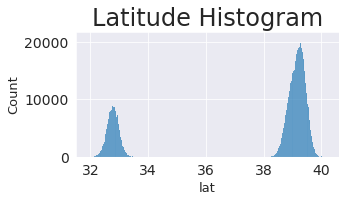

In [158]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'lat')
ax.set(title='Latitude Histogram')
plt.show()

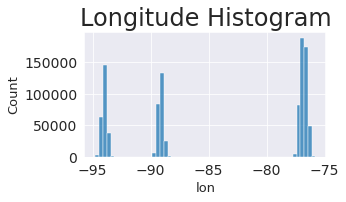

In [157]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=all_data, x = 'lon')
ax.set(title='Longitude Histogram')
plt.show()

There are clusters within the latitudes and longitudes that students live. This will be handled by bucking the students into various zones. First, check where these zones are.

In [79]:
lat31_35lon90_86 = all_data.query('lat > 31 & lat < 35 & lon > -90 & lon < -86')
lat31_35lon90_86.shape

(248691, 13)

In [80]:
lat31_35lon96_92 = all_data.query('lat > 31 & lat < 35 & lon > -96 & lon < -92')
lat31_35lon96_92.shape

(0, 13)

In [81]:
lat31_35lon80_75 = all_data.query('lat > 31 & lat < 35 & lon > -80 & lon < -75')
lat31_35lon80_75.shape

(0, 13)

In [82]:
lat38_41lon90_86 = all_data.query('lat > 38 & lat < 41 & lon > -90 & lon < -86')
lat38_41lon90_86.shape

(0, 13)

In [83]:
lat38_41lon96_92 = all_data.query('lat > 38 & lat < 41 & lon > -96 & lon < -92')
lat38_41lon96_92.shape

(250369, 13)

In [84]:
lat38_41lon80_75 = all_data.query('lat > 38 & lat < 41 & lon > -80 & lon < -75')
lat38_41lon80_75.shape

(500838, 13)

In [85]:
(lat38_41lon80_75.shape[0] + lat38_41lon96_92.shape[0] + lat31_35lon90_86.shape[0]) / all_data.shape[0]

1.0

The students are divided into three zones: 

* Latitude: (38,41), Longitude: (-80, -75)

* Latitude: (38,41), Longitude: (-96, -92)

* Latitude: (31,35), Longitude: (-90, -86)

These three zones account for all of the students with no overlap. The data will be bucketed into these three zones.

In [86]:
all_data['Location'] = np.where((all_data['lat'] > 38.0) & (all_data['lat'] < 41.0) 
        & (all_data['lon'] > -80.0) & (all_data['lon'] < -75.0), 'Zone 1',
        np.where((all_data['lat'] > 38) & (all_data['lat'] < 41) 
        & (all_data['lon'] > -96) & (all_data['lon'] < -92), 'Zone 2',
        np.where((all_data['lat'] > 31) & (all_data['lat'] < 35) 
        & (all_data['lon'] > -90) & (all_data['lon'] < -86), 'Zone 3', 'No Zone')))

In [87]:
all_data['Location'].value_counts()

Zone 1    500838
Zone 2    250369
Zone 3    248691
Name: Location, dtype: int64

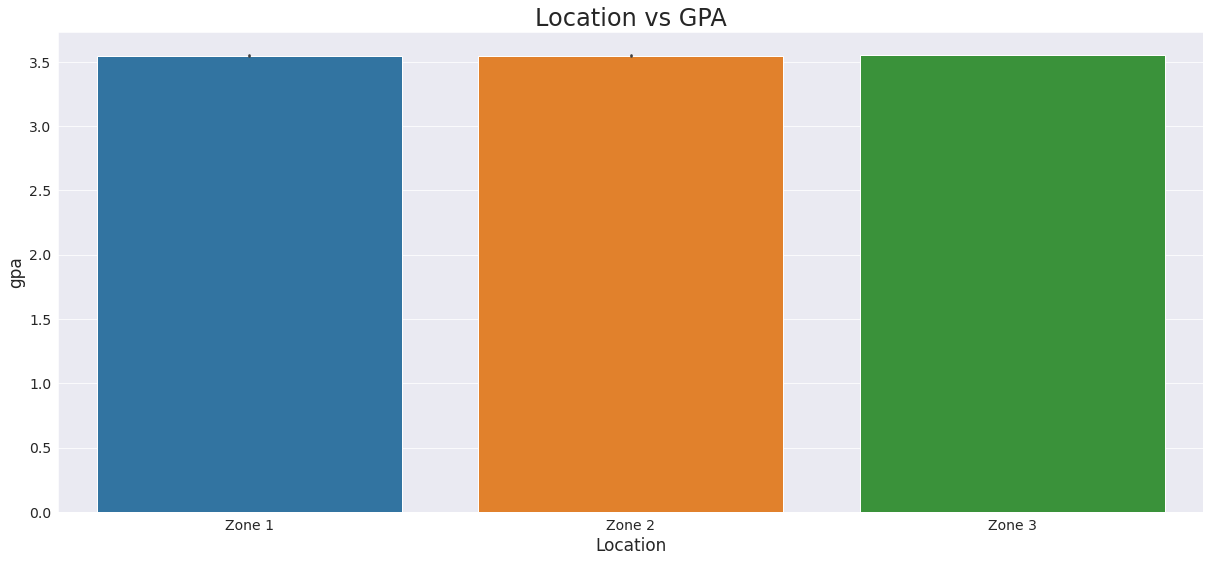

In [102]:
plt.figure(figsize=(17,8), tight_layout=True)
ax = sns.barplot(x='Location', y='gpa', data=all_data)
ax.set(title='Location vs GPA')
plt.show()

In [103]:
all_data.groupby('Location')['gpa'].describe().T

Location,Zone 1,Zone 2,Zone 3
count,500838.000000,250369.000000,248691.000000
mean,3.548539,3.547385,3.552541
std,0.601659,0.598676,0.598513
min,0.000000,0.230000,0.000000
25%,3.210000,3.200000,3.220000
50%,3.870000,3.860000,3.880000
75%,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


In [88]:
del all_data['lat']
del all_data['lon']

Approximately half of the students live in Zone 1, which is Latitude: (38,41), Longitude: (-80, -75), approximately a quarter of the students live in Zone 2 and Zone 3 each, which are  Latitude: (38,41), Longitude: (-96, -92) and Latitude: (31,35), Longitude: (-90, -86) respectively. Each zone appears to have similar GPAs and may not be a great predictor of GPA.

# Evaluation

There are several issues with evaluating this problem. 

Firstly, the overwhelming amount of students with a 4.0 GPA. As discovered during data exploration, nearly half of the student semesters in the data set have a 4.0 GPA. Thus, our dependant variable has an abnormal distribution. To combat this, the GPAs were square root transformed prior to training models.

Secondly, an assumption was made about how to deal with Null values in the 'tutoring' variable to fill them with 'No.' If this assumption is incorrect and these students might have recieved tutoring, this could cause innacuracies in the models.

Third, a disproportionate amount of students recieved tutoring compared to those who did not. Less than 10% of students recieved tutoring. A correlation between this variable and grade was found during data exploration, but this correlation may be due to chance due to the few number of students who actually received tutoring.

Lastly, GPA is a difficult metric to predict as it is capped at 4.0. Predictions over 4.0 may be penalized even though they should not be. These predictions should be interpreted as correct if the actual student's GPA was 4.0.

To evalute the models, Root Mean Square Error (RMSE) will be used. This will be used due to the fact that our dependent variable is on a small scale (0 to 4.0). RMSE will penalize incorrect predictions more the further they are from the true value, this is necessary when working in such a small range of values.

# Modeling

## Preprocessing

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

#### Create transformers for numeric, categorical data and GPA

Include imputer in case there are missing values that weren't detected before. For numeric, include a scaler in case any variables need to be scaled. For categorical, include one hot encoder to one hot encode the data.

In [90]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse= False))
])

In [91]:
categorical_cols = all_data.select_dtypes(include=['object', 'category']).columns
numeric_cols = all_data.select_dtypes(include=['int64', 'float64']).columns

#### Remove GPA from numeric columns

In [92]:
numeric_cols = numeric_cols.drop('gpa')

#### Combine preprocessors and create pipeline

In [93]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('prepreocessor,', preprocessor)
])

#### Apply preprocessor to data
Square root transform GPA to account for the grade inflation and make the distribution slightly more normal

In [94]:
x = all_data.drop('gpa', axis=1)
y = np.sqrt(all_data['gpa'])
preprocessed_x = pipeline.fit_transform(x)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

## Training

In [96]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=40),
    'KNN': KNeighborsRegressor()
}

The three types of models that will be trained are Linear Regression, Random Forest, and KNN Regressor.

#### Define the hyperparameters that will be tested for each model
Using SKLearn's Grid Search CV to test for optimal hyperparameters

In [97]:
params = {
    'LinearRegression': {},
    'KNN': {
        'n_neighbors': [5, 10, 15],
    },
    'RandomForest': {
        'max_depth': [10, 30],
        'n_estimators': [100, 200],
        'min_samples_split': [2, 5]
    }
}

#### Create test and train split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_x, y, test_size = 0.2, random_state=40)

#### Use 2-fold Cross Validation

In [99]:
cv = KFold(n_splits=2, shuffle=True, random_state=40)

#### Train and optimze models
Using RMSE to evaluate the models

In [100]:
grids = {}
for name, model in models.items():
    print(f'Training {name}')
    grids[name] = GridSearchCV(estimator=model, param_grid=params[name], cv=cv, scoring='neg_mean_squared_error',verbose=2)
    grids[name].fit(x_train, y_train)
    optimal_params = grids[name].best_params_
    best_score = np.sqrt(-1*grids[name].best_score_)
    print(f'Optimal Parameters for {name}: {optimal_params}\nBest RMSE for {name}: {best_score}')

Training LinearRegression
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.4s
Optimal Parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.11951767249465678
Training RandomForest
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.1min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.1min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 4.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 9.4min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 4.5min
[CV] END

After training the three types of models over several different combinations of hyperparameters, a Random Forest Regression model with 200 trees, a max depth of 30, and a minimum of 5 samples required to split a node produced the most accurate results. The hyperparameters selected can be trusted to be fairly optimal due to 16 different combinations of parameters being tested. The RMSE for this model using 2-fold cross validation was 0.092. This indicates that the square root of the variance of the residuals was 0.092.

## Testing my own information

In [125]:
my_info = {'id': [116624480,123456,123456,123466,123456], 'avg_hours_studied': [5,10,0,1,2], 
                  'parents_income': [190000,100000,100000,150000,150000], 'major': ['CS', 'Math', 'Engineering', 'English', 'Physics'], 
                  'tutoring': ['No', 'Yes','Yes','Yes','Yes'], 'semester': ['Spring', 'Fall', 'Spring', 'Fall', 'Spring'], 'credits': [16, 15,12,9,12],
                  'student_age': [22,21,20,19,18], 'student_year': ['Senior','Sophomore','Junior','Freshman','Senior'],
                  'year': [2023,2022,2021,2020,2019], 'Location': ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 1', 'Zone 2']}
my_data = pd.DataFrame.from_dict(my_info)

In [124]:
preprocessed = pipeline.fit_transform(my_data)
my_gpa = grids['RandomForest'].predict(preprocessed)
print(f'My predicted GPA at this University would be {round(np.power(my_gpa[0],2),2)}')

My predicted GPA at this University would be 3.86


After entering my own information into my model, my predicted GPA for this semester would be 3.86. My actual GPA is either going to be 3.83 ot 3.88 this semester, making this prediction extremely accurate.

# Conclusion

## Process

After exploring the data, it was clear which variables would be useful and what preprocessing and feature engineering was required for the data.

The data required binning (latitude and longitude), dealing with outliers (hours studied), and missing value replacement (tutoring) in order to have clean data.

Once this was completed, I trained three types of models. I used grid search CV in order to test 22 combinations of hyperparameters across the three models. This produced RMSEs ranging from 0.092 to 0.12 across the three types of models.

## Model Success

As stated above, the most accurate model trained was a Random Forest Regression model with 200 trees, a max depth of 30, and a minimum of 5 samples required to split a node. This model produced a RMSE of 0.092. For a model predicting GPAs on a scale of 0 to 4.0, this is a fairly good RMSE. I feel that my model was quite successful in predicting GPA. The fact that the model was able to predict my own GPA with high accuracy makes me feel more satisfied with the result of my model.

## Moving Forward

If I were to move forward with predicting GPA, there is different types of data that would further improve my predictions.

One dataset that would be useful is a dataset about the specific classes at the university. This dataset would include things like the professor teaching the class, the level of the class, and the average GPA of the class. Then I would need the student dataset to include the specific classes that they took in that semester as well. I believe that the classes that someone takes in a semester has a significant impact on their GPA that semester and this would help improve my predictions.

Some other data that would be interesting to explore in relation to GPA could be other characteristics of the students. Things such as gender, height, what type of highschool they went to, etc. would be interesting to explore to see if they had a correlation to GPA.